In [12]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:

import warnings
warnings.filterwarnings("ignore")

In [14]:
aord = pd.read_csv('indice/ALLOrdinary.csv')
nikkei = pd.read_csv('indice/Nikkei225.csv')
hsi = pd.read_csv('indice/HSI.csv')
daxi = pd.read_csv('indice/DAXI.csv')
cac40 = pd.read_csv('indice/CAC40.csv')
sp500 = pd.read_csv('indice/SP500.csv')
dji = pd.read_csv('indice/DJI.csv')
nasdaq = pd.read_csv('indice/nasdaq_composite.csv')
spy = pd.read_csv('indice/SPY.csv')


In [15]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,2653.909912,2661.500000,2597.810059,2609.629883,2609.629883,2076690000
1,2008-01-03,2611.959961,2624.270020,2592.179932,2602.679932,2602.679932,1970200000
2,2008-01-04,2571.080078,2571.080078,2502.679932,2504.649902,2504.649902,2516310000
3,2008-01-07,2514.149902,2521.620117,2471.229980,2499.459961,2499.459961,2600100000
4,2008-01-08,2506.969971,2527.419922,2440.510010,2440.510010,2440.510010,2566480000


In [16]:
indicepanel=pd.DataFrame(index=spy.index)
indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1']=indicepanel['spy'].shift(1)
indicepanel['spy500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

indicepanel['aord']=aord['Open']-aord['Open'].shift(1)
indicepanel['hsi']=hsi['Open']-hsi['Open'].shift(1)
indicepanel['nikkei']=nikkei['Open']-nikkei['Open'].shift(1)

indicepanel['Price']=spy['Open']

In [17]:
indicepanel.head()

,spy,spy_lag1,spy500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
0,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.529999
1,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,4.100097,-582.169922,-606.350586,144.910004
2,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-35.000000,-45.689453,-120.080078,143.339996
3,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-29.900390,-41.800781,-64.589844,141.809998
4,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-124.599610,504.421875,181.610352,142.080002


In [18]:
indicepanel=indicepanel.fillna(method='ffill')
indicepanel=indicepanel.dropna()

In [19]:
indicepanel.isnull().sum()

spy         0
spy_lag1    0
spy500      0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [20]:
indicepanel.to_csv("indicepanel.csv")

In [21]:
indicepanel.shape

(2678, 11)

In [22]:
Train=indicepanel.iloc[-2000:-1000,:]
Test=indicepanel.iloc[-1000:,:]
print(Train.shape,Test.shape)

(1000, 11) (1000, 11)


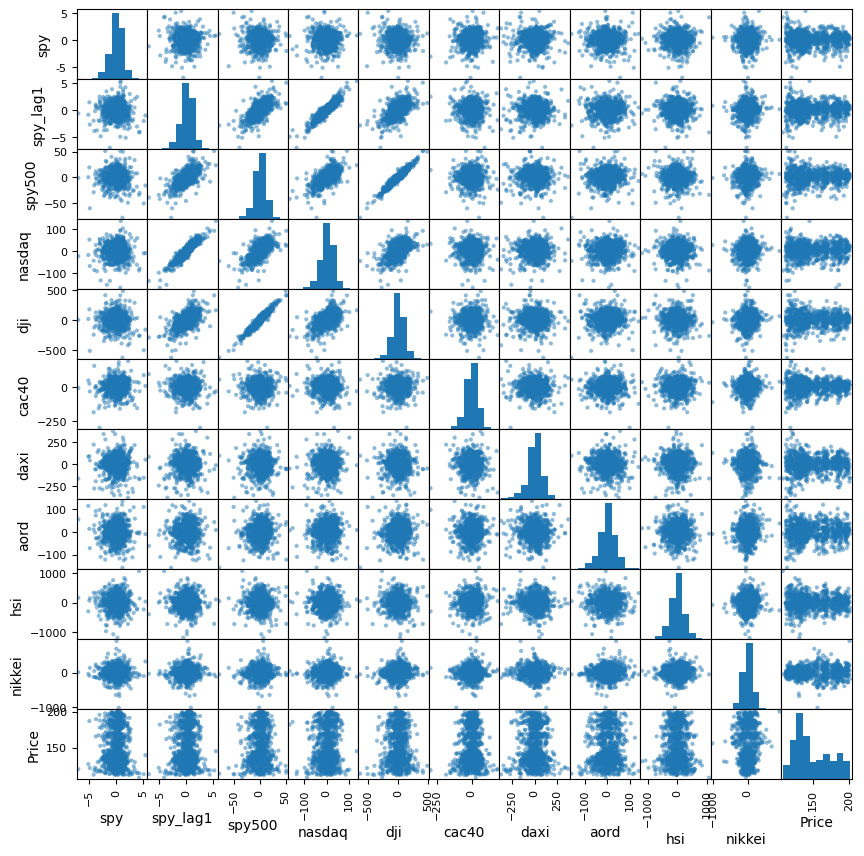

In [23]:
from pandas.plotting import scatter_matrix
sm=scatter_matrix(Train,figsize=(10,10))

In [24]:
Train.iloc[:,:-1].corr()['spy']

spy         1.000000
spy_lag1   -0.011623
spy500     -0.018632
nasdaq      0.012333
dji        -0.037097
cac40       0.076886
daxi        0.019410
aord       -0.003211
hsi        -0.006059
nikkei      0.017621
Name: spy, dtype: float64

In [25]:
formula = 'spy ~ spy_lag1 + spy500 + nasdaq + dji + cac40 + daxi + aord + nikkei + hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.531
Date:                Sat, 07 Dec 2024   Prob (F-statistic):              0.132
Time:                        04:45:53   Log-Likelihood:                -1645.8
No. Observations:                1000   AIC:                             3312.
Df Residuals:                     990   BIC:                             3361.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0842      0.040      2.101      0.036       0.006       0.163
spy_lag1      -0.1229      0.092     -1.333      0.183      -0.304       0.058
spy500         0.0195      0.014      1.390      0.165      -0.008       0.047
nasdaq         0.0046      0.004      1.202      0.230      -0.003       0.012
dji           -0.0024      0.001     -1.672      0.095      -0.005       0.000
cac40          0.0021      0.001      2.372      0.018       0.000       0.004
daxi           0.0003      0.000      0.556      0.578      -0.001       0.001
aord          -0.0002      0.001     -0.176      0.860      -0.002       0.002
nikkei         0.0002      0.000      0.653      0.514      -0.000       0.001
hsi        -4.672e-05      0.000     -0.287      0.775      -0.000       0.000
==============================================================================
Omnibus:                       88.021   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.690
Skew:                          -0.448   Prob(JB):                     1.64e-54
Kurtosis:                       5.268   Cond. No.                         568.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
Train.iloc[:,:-1].corr()

,spy,spy_lag1,spy500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei
spy,1.000000,-0.011623,-0.018632,0.012333,-0.037097,0.076886,0.019410,-0.003211,-0.006059,0.017621
spy_lag1,-0.011623,1.000000,0.664272,0.932118,0.575321,-0.035791,0.030278,0.031071,-0.004987,0.074009
spy500,-0.018632,0.664272,1.000000,0.636528,0.960032,0.004462,0.000139,0.064091,-0.044067,0.060138
nasdaq,0.012333,0.932118,0.636528,1.000000,0.517313,-0.023789,0.040097,0.039624,-0.014202,0.061362
dji,-0.037097,0.575321,0.960032,0.517313,1.000000,0.008134,-0.010432,0.059409,-0.045309,0.079577
cac40,0.076886,-0.035791,0.004462,-0.023789,0.008134,1.000000,-0.015331,0.010794,0.035935,0.069928
daxi,0.019410,0.030278,0.000139,0.040097,-0.010432,-0.015331,1.000000,-0.025151,-0.026719,-0.024687
aord,-0.003211,0.031071,0.064091,0.039624,0.059409,0.010794,-0.025151,1.000000,-0.015818,0.068531
hsi,-0.006059,-0.004987,-0.044067,-0.014202,-0.045309,0.035935,-0.026719,-0.015818,1.000000,0.027174
nikkei,0.017621,0.074009,0.060138,0.061362,0.079577,0.069928,-0.024687,0.068531,0.027174,1.000000


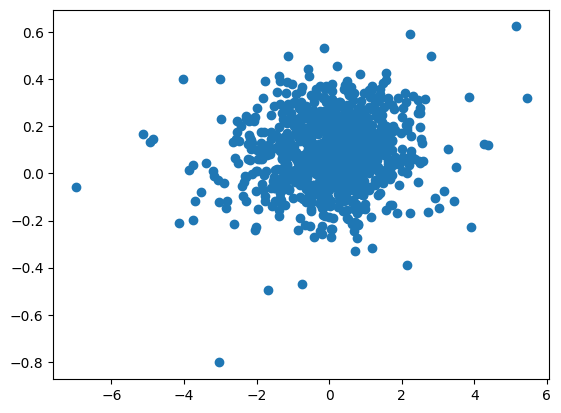

In [27]:
Train['PredictedY']=lm.predict(Train)
Train['PredictedX']=lm.predict(Test)
plt.scatter(Train['spy'],Train['PredictedY'])

In [28]:
def adjustedMetric(data,model,model_k,yname):
    data['yhat']=model.predict(data)
    SST=((data[yname]-data[yname].mean())**2).sum()
    SSR=((data['ythat']-data[yname].mean())**2).sum()
    SSE=((data[yname]-data['ythat'].mean())**2).sum()
    r2=SSR/SST
    adjustR2=1-(1-r2)*(data.shape[0]-1)/(data.shape[0]-model_k-1)
    RMSE=(SSE/(data.shape[0]-model_k-1))**0.5
    return adjustR2,RMSE

Train['ythat'] = lm.predict(Train.drop('spy', axis=1))
Test['ythat'] = lm.predict(Test.drop('spy', axis=1))

In [29]:
print("Adjusted R2 and RMSE on Train: ", adjustedMetric(Train, lm, 9, 'spy'))
print("Adjusted R2 and RMSE on Test: ", adjustedMetric(Test, lm, 9, 'spy')) 

Adjusted R2 and RMSE on Train:  (np.float64(0.0047640559029860086), np.float64(1.2696663578292966))
Adjusted R2 and RMSE on Test:  (np.float64(0.008403992701756513), np.float64(1.74604758590724))


In [30]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [31]:
assessTable(Test, Train, lm, 9, 'spy')

,Train,Test
R2,0.004764,0.008404
RMSE,1.269666,1.746048
